# Data Preprocess

In [1]:
import pandas as pd
import numpy as np


In [2]:
data_path = "data/tokyo_trade_price.csv"

In [3]:
# get data in 2019 only
df = pd.read_csv(data_path)
df = df[df["Year"] == 2019].drop(columns=["No"])
df

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks
0,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,3rd quarter 2019,2019,3,Not yet,NaN
1,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,3rd quarter 2019,2019,3,Done,NaN
2,Residential Land(Land and Building),Commercial Area,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,2,2.0,2.0,...,Ward Road,4.0,Commercial Zone,80.0,500.0,2nd quarter 2019,2019,2,NaN,NaN
3,Residential Land(Land and Building),Commercial Area,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,1,1.0,1.0,...,Tokyo Metropolitan Road,27.0,Commercial Zone,80.0,700.0,2nd quarter 2019,2019,2,NaN,NaN
4,"Pre-owned Condominiums, etc.",NaN,13101,Tokyo,Chiyoda Ward,Iidabashi,Iidabashi,4,4.0,4.0,...,NaN,NaN,Commercial Zone,80.0,500.0,2nd quarter 2019,2019,2,Done,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359989,Forest Land,NaN,13401,Tokyo,Hachijo Town,Mitsune,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1st quarter 2019,2019,1,NaN,NaN
359990,Forest Land,NaN,13401,Tokyo,Hachijo Town,Mitsune,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1st quarter 2019,2019,1,NaN,NaN
359991,Residential Land(Land Only),Residential Area,13401,Tokyo,Hachijo Town,Mitsune,NaN,NaN,NaN,NaN,...,Town Road,5.0,Non-divided City Planning Area,70.0,200.0,1st quarter 2019,2019,1,NaN,NaN
360068,Residential Land(Land and Building),Residential Area,13421,Tokyo,Ogasawara Village,Chichijima,NaN,NaN,NaN,NaN,...,Village Road,5.5,Non-divided City Planning Area,70.0,200.0,3rd quarter 2019,2019,3,NaN,NaN


In [4]:
# check and count for NaN values
df = df.replace("NaN", np.nan)
df.isna().sum()

Type                               0
Region                          9717
MunicipalityCode                   0
Prefecture                         0
Municipality                       0
DistrictName                       0
NearestStation                    60
TimeToNearestStation              73
MinTimeToNearestStation           73
MaxTimeToNearestStation           76
TradePrice                         0
FloorPlan                       9273
Area                               0
AreaIsGreaterFlag                  0
UnitPrice                      15803
PricePerTsubo                  15803
LandShape                       9721
Frontage                       10479
FrontageIsGreaterFlag              0
TotalFloorArea                 12686
TotalFloorAreaIsGreaterFlag        0
BuildingYear                    3318
PrewarBuilding                     0
Structure                       3293
Use                             5734
Purpose                         1402
Direction                       9717
C

In [5]:
df = df[["Area", "DistrictName", "BuildingYear", "TimeToNearestStation", "Renovation", "TradePrice"]]
df.head()

,Area,DistrictName,BuildingYear,TimeToNearestStation,Renovation,TradePrice
0,30,Iidabashi,2013.0,4,Not yet,40000000
1,80,Iidabashi,2007.0,4,Done,130000000
2,110,Iidabashi,2018.0,2,NaN,400000000
3,50,Iidabashi,1976.0,1,NaN,180000000
4,65,Iidabashi,2007.0,4,Done,100000000


In [6]:
df = df.dropna()

In [7]:
df = df.reset_index(drop=True)

In [8]:
df

,Area,DistrictName,BuildingYear,TimeToNearestStation,Renovation,TradePrice
0,30,Iidabashi,2013.0,4,Not yet,40000000
1,80,Iidabashi,2007.0,4,Done,130000000
2,65,Iidabashi,2007.0,4,Done,100000000
3,20,Iidabashi,1997.0,4,Done,24000000
4,65,Iidabashi,2003.0,4,Done,98000000
...,...,...,...,...,...,...
8422,65,Yatocho,2014.0,11,Not yet,40000000
8423,85,Yatocho,2003.0,9,Done,46000000
8424,75,Yatocho,2003.0,17,Not yet,40000000
8425,80,Yatocho,1997.0,2,Not yet,49000000


# Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


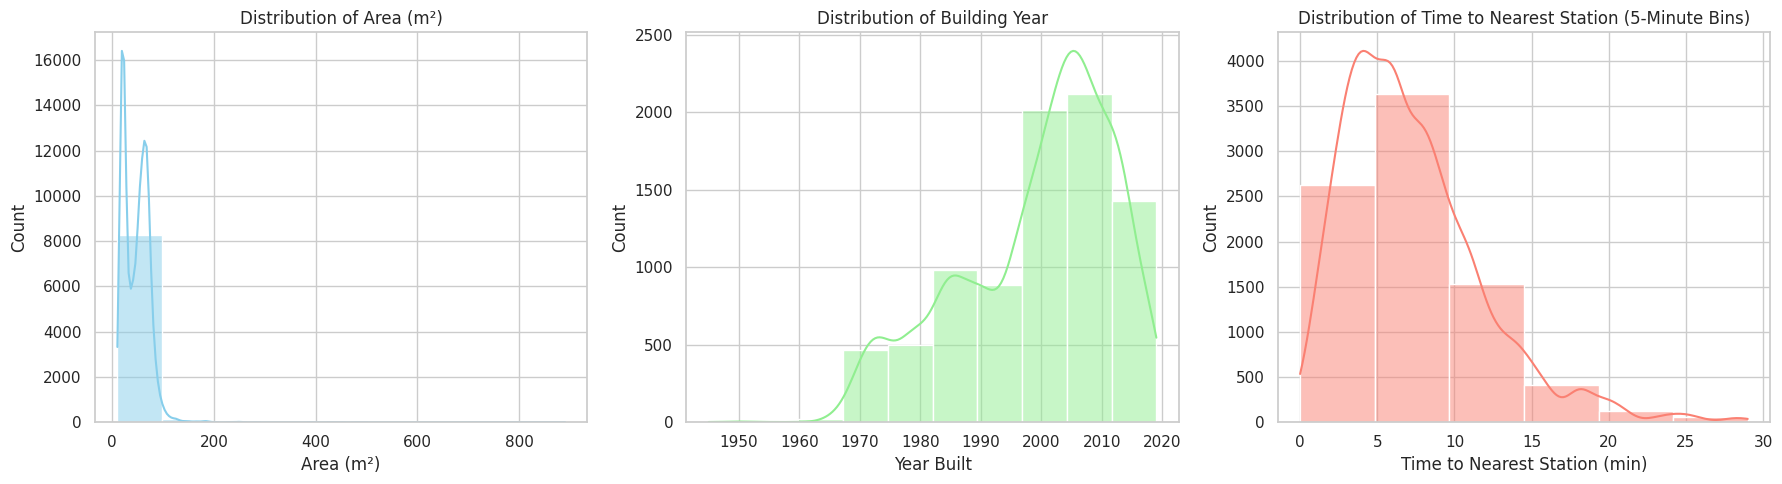

In [45]:
df['TimeToNearestStation'] = pd.to_numeric(df['TimeToNearestStation'], errors='coerce')


# Create subplots
plt.figure(figsize=(18, 5))

# 1. Area
plt.subplot(1, 3, 1)
sns.histplot(df['Area'], kde=True, bins=10, color="skyblue")
plt.title('Distribution of Area (m²)')
plt.xlabel('Area (m²)')
plt.ylabel('Count')

# 2. Building Year
plt.subplot(1, 3, 2)
sns.histplot(df['BuildingYear'], kde=True, bins=10, color="lightgreen")
plt.title('Distribution of Building Year')
plt.xlabel('Year Built')
plt.ylabel('Count')

# 3. Time to Nearest Station
plt.subplot(1, 3, 3)
sns.histplot(df['TimeToNearestStation'], binwidth=5, kde=True, color="salmon")
plt.title("Distribution of Time to Nearest Station (5-Minute Bins)")
plt.xlabel("Time to Nearest Station (min)")
plt.ylabel("Count")
max_time = int(df['TimeToNearestStation'].max())
plt.xticks(range(0, max_time + 5, 5))

plt.tight_layout()
plt.show()

